In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
palette_color = sns.color_palette('crest')
sns.set()

In [2]:
raw_data=pd.read_csv('E:\DS\DATA\sales_data.csv',encoding='windows-1252')
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data=raw_data.copy()
data.shape

(9994, 21)

In [4]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

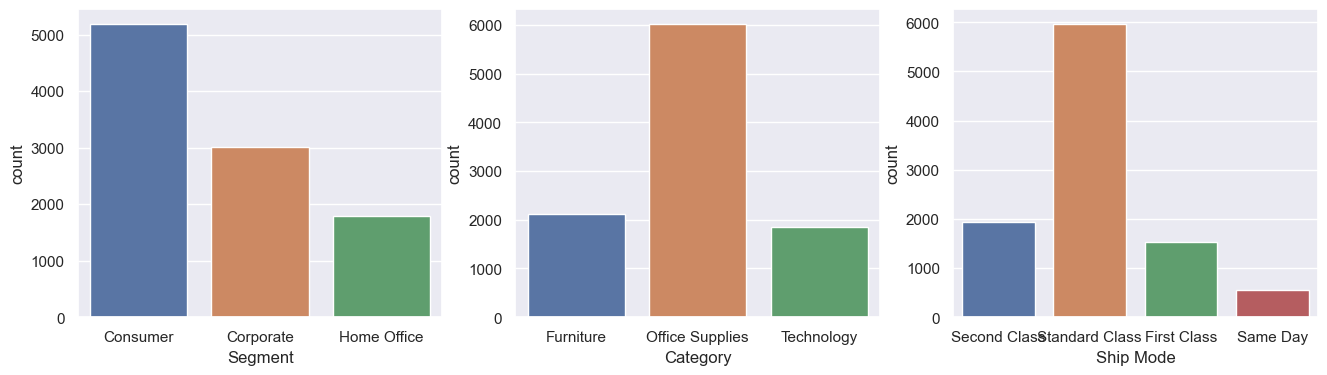

In [6]:
_,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,4))
sns.countplot(x='Segment',data=data,ax=axes[0])
sns.countplot(x='Category',data=data,ax=axes[1])
sns.countplot(x='Ship Mode',data=data,ax=axes[2])

In [7]:
#data['Order Date']=pd.to_datetime(data['Order Date'],format='%d/%m/%y').dt.strftime('%Y-%m-%d')
data['Order Date']=pd.to_datetime(data['Order Date'],format='%m/%d/%Y')
data['Ship Date']=pd.to_datetime(data['Ship Date'],format='%m/%d/%Y')
data['shipping_time']=(data['Ship Date']-data['Order Date']).dt.days
today=dt.datetime(2019,1,1)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


<AxesSubplot: xlabel='Ship Mode', ylabel='shipping_time'>

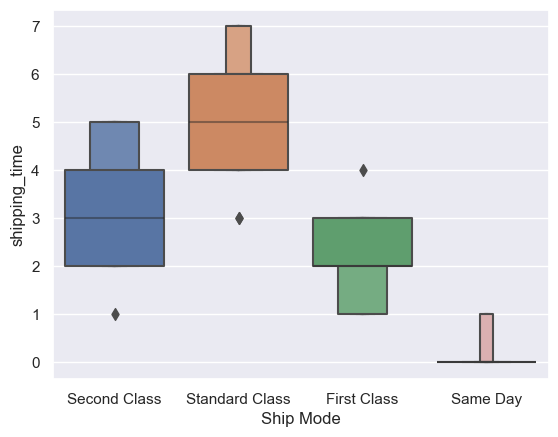

In [8]:
sns.boxenplot(y=data["shipping_time"],x=data["Ship Mode"])

In [46]:
def check_delivery(row):
    if row['Ship Mode']=='First Class' and row['shipping_time']>2:
        return 0
    elif row['Ship Mode']=='Second Class' and row['shipping_time']>3:
        return 0
    elif row['Ship Mode']=='Standard Class' and row['shipping_time']>5:
        return 0
    elif row['Ship Mode']=='Same Day' and row['shipping_time']>1:
        return 0
    return 1
data['is_expected_delivery']=data.apply(lambda row: check_delivery(row),axis=1)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time,is_expected_delivery,Customer_type
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,3,1,Needs Attention
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,3,1,Needs Attention
2,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160,1,1,Needs Attention
3,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,6,0.6,-95.2476,0,1,Needs Attention
4,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,Office Supplies,Paper,Xerox 1986,5.344,1,0.2,1.8704,0,1,Needs Attention


<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

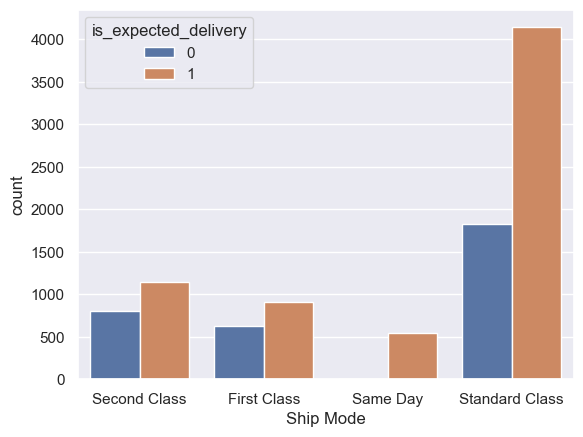

In [47]:
sns.countplot(x=data["Ship Mode"],hue=data["is_expected_delivery"])

In [48]:
late_shipped_customers=data.loc[data.is_expected_delivery==0,'Customer ID'].unique()
late_shipped_customers.shape

(686,)

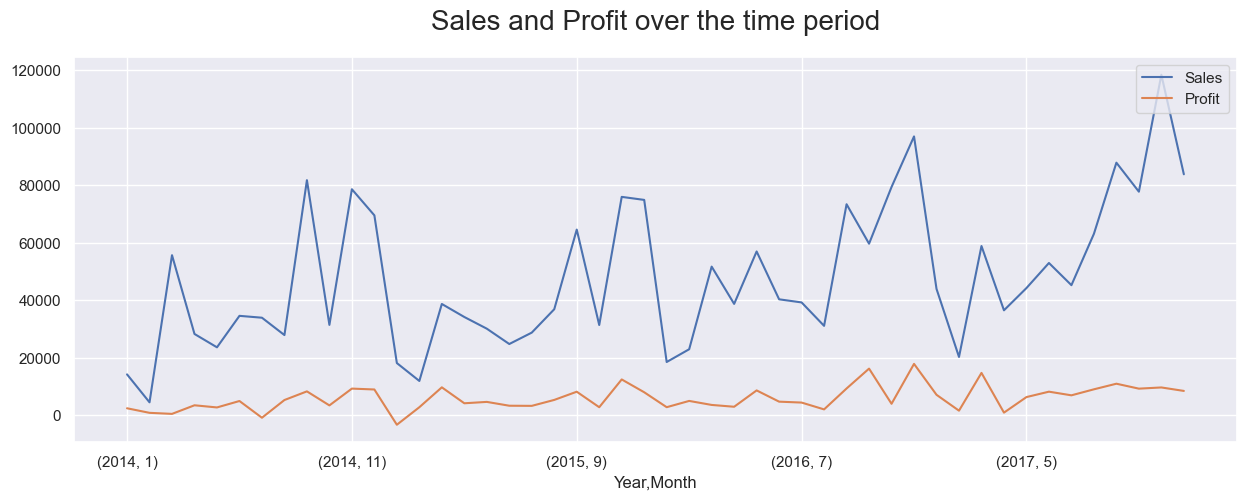

In [54]:
df=data[['Order Date','Sales','Profit']].copy()
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
df.drop('Order Date',axis=1,inplace=True)
plt.figure(figsize=[15,5])
df.groupby(['Year','Month'])['Sales'].sum().plot()
df.groupby(['Year','Month'])['Profit'].sum().plot()
plt.title("Sales and Profit over the time period", size=20, pad=20)
plt.legend(["Sales", "Profit"], loc ="upper right")
plt.show()

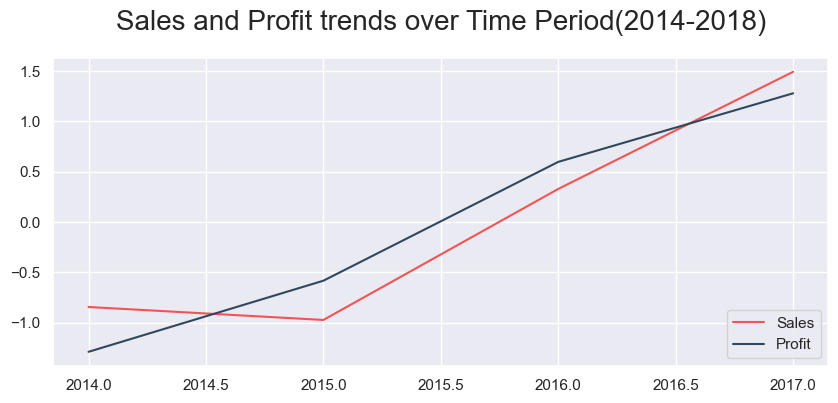

In [58]:
sales_trend=df.groupby('Year').sum().sort_values('Year')
#print(scaler.fit_transform(sales_trend.Sales).shape)
scaler=StandardScaler()
sales_trend.Sales=scaler.fit_transform(sales_trend[['Sales']])
sales_trend.Profit=scaler.fit_transform(sales_trend[['Profit']])

plt.figure(figsize=[10,4])
plt.plot(sales_trend.index, 'Sales', data=sales_trend, color='#F05454') # Avg Sales over Time
plt.plot(sales_trend.index, 'Profit', data=sales_trend, color='#30475E') # Avg Profit over Time
plt.title("Sales and Profit trends over Time Period(2014-2018)", size=20, pad=20)
plt.legend(["Sales", "Profit"], loc ="lower right")
plt.show()
#sales_trend.head()

In [25]:
rfm_data=data.groupby('Customer ID').agg({'Sales':lambda x: x.sum(),
                                           'Order Date':lambda x: (today-x.max()).days,
                                            'Order ID':lambda x: len(x)})
rename=['monetary', 'recency', 'frequency']
rfm_data.columns=rename
rfm_data.head()

,monetary,recency,frequency
Customer ID,,,
AA-10315,5563.560,551,11
AA-10375,1056.390,386,15
AA-10480,1790.512,626,12
AA-10645,5086.935,422,18
AB-10015,886.156,782,6


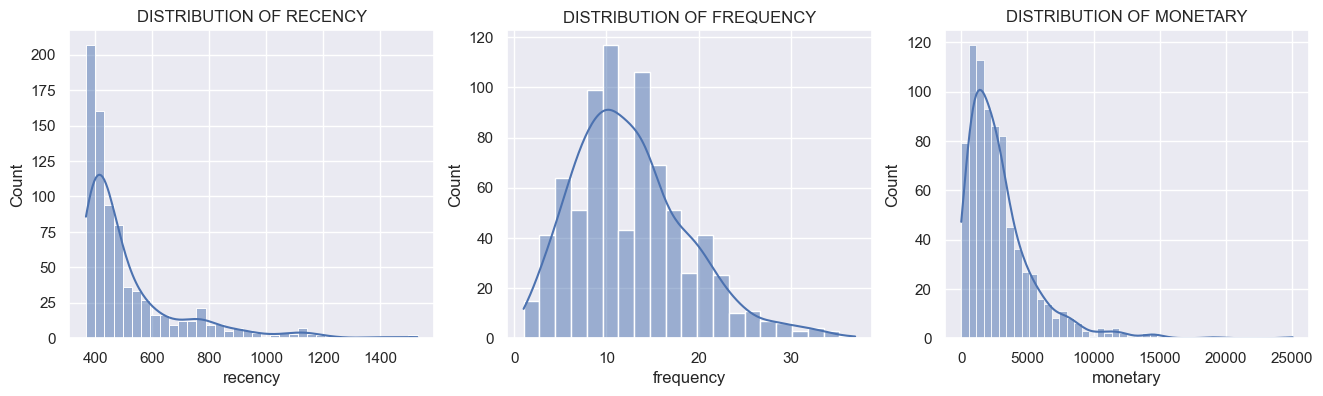

In [26]:
plt.figure(figsize=(16,4))
# Plot distribution of recency
plt.subplot(1, 3, 1); sns.histplot(rfm_data['recency'],kde=True)
plt.title('DISTRIBUTION OF RECENCY')
# Plot distribution of frequency
plt.subplot(1, 3, 2); sns.histplot(rfm_data['frequency'],kde=True)
plt.title('DISTRIBUTION OF FREQUENCY')
# Plot distribution of monetary
plt.subplot(1, 3, 3); sns.histplot(rfm_data['monetary'],kde=True)
plt.title('DISTRIBUTION OF MONETARY')
# Show the plot
plt.show()

In [27]:
#StandardScaler makes mean = 0 and scales the data to unit variance
scaler=StandardScaler()
scaled_data=scaler.fit_transform(rfm_data)
scaled_rfm=pd.DataFrame(scaled_data,columns=['monetary','recency','frequency'])
scaled_rfm.head()

,monetary,recency,frequency
0,1.015112,0.199889,-0.256912
1,-0.700590,-0.686762,0.384256
2,-0.421139,0.602912,-0.096620
3,0.833680,-0.493311,0.865131
4,-0.765391,1.441199,-1.058371


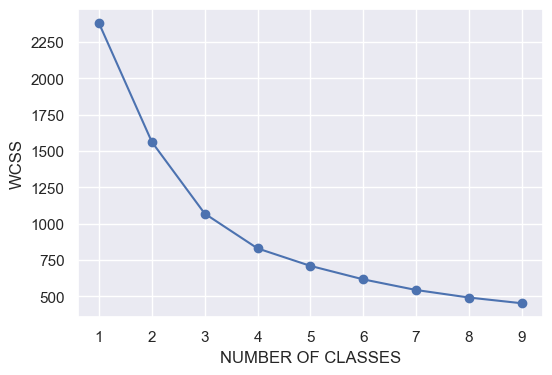

In [28]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i,random_state=44)
    kmeans.fit(scaled_rfm)
    wcss.append(kmeans.inertia_)
clus_no=range(1,10)
plt.subplots(figsize=(6,4))
plt.scatter(clus_no,wcss)
plt.plot(clus_no,wcss)
plt.xlabel('NUMBER OF CLASSES')
plt.ylabel('WCSS')
plt.show()

In [29]:
#By the plot ,the most effective k is equals to 5
kmeans=KMeans(4,random_state=44)
kmeans.fit(scaled_data)
rfm_data['Clusters']=kmeans.fit_predict(scaled_rfm)
rfm_data.head()

,monetary,recency,frequency,Clusters
Customer ID,,,,
AA-10315,5563.560,551,11,3
AA-10375,1056.390,386,15,3
AA-10480,1790.512,626,12,1
AA-10645,5086.935,422,18,3
AB-10015,886.156,782,6,2


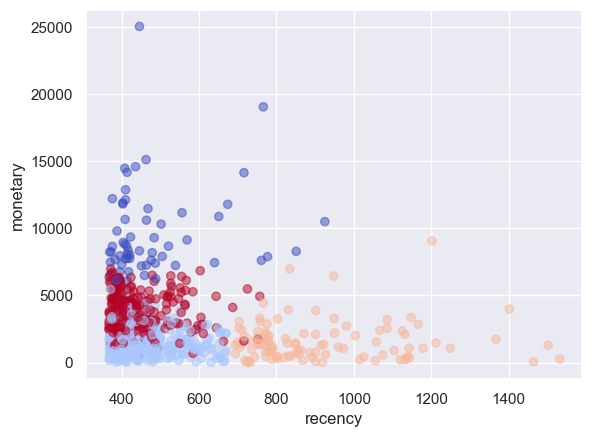

In [30]:
plt.scatter(rfm_data['recency'],rfm_data['monetary'],c=rfm_data['Clusters'],cmap='coolwarm',alpha=0.5)
plt.xlabel('recency')
plt.ylabel('monetary')
plt.show()

In [31]:
#Determining the cluster indicating the type of customer
rfm_data.groupby('Clusters').mean()

,monetary,recency,frequency
Clusters,,,
0,9457.539378,476.730159,21.142857
1,1548.773829,460.543103,8.781609
2,1574.658788,909.619048,7.800000
3,3599.506911,439.104693,17.281588


In [32]:
# Declaring that customer to different types by their cluster means
rfm_data['Customer_type']=rfm_data['Clusters'].map({0:'Champions',1:'loyal customer',3:'potential Customer',2:'Needs Attention'})
rfm_data.head()

,monetary,recency,frequency,Clusters,Customer_type
Customer ID,,,,,
AA-10315,5563.560,551,11,3,potential Customer
AA-10375,1056.390,386,15,3,potential Customer
AA-10480,1790.512,626,12,1,loyal customer
AA-10645,5086.935,422,18,3,potential Customer
AB-10015,886.156,782,6,2,Needs Attention


In [33]:
customer_targets=rfm_data.loc[rfm_data.Clusters==2].index.values
print(customer_targets.shape)

(105,)


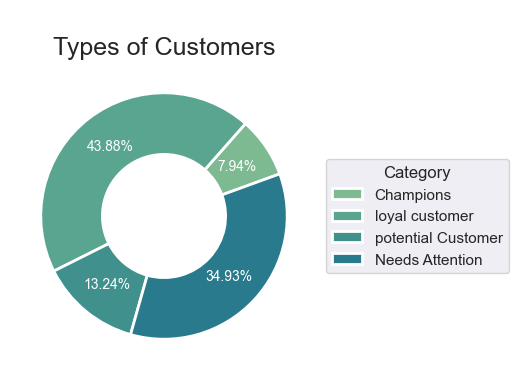

In [34]:
plt.subplots(figsize=(20, 4))

labels = 'Champions','loyal customer','potential Customer','Needs Attention'
wedges, texts, autotexts = plt.pie([rfm_data.loc[rfm_data.Clusters==0].shape[0],
                                    rfm_data.loc[rfm_data.Clusters==1].shape[0],
                                    rfm_data.loc[rfm_data.Clusters==2].shape[0],
                                    rfm_data.loc[rfm_data.Clusters==3].shape[0]],
                                   textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    colors = palette_color,
                                    wedgeprops=dict(width=0.5,linewidth = 2),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nTypes of Customers",fontsize=18);
plt.show()

In [68]:
rfm_data.reset_index(level=0,inplace=True)
data=pd.merge(data,rfm_data[['Customer ID','Customer_type']],on='Customer ID')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,shipping_time,is_expected_delivery,Customer_type_x,Clusters,Customer_type_y,Customer_type
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.960,2,0.0,41.9136,3,1,Needs Attention,2,Needs Attention,Needs Attention
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.940,3,0.0,219.5820,3,1,Needs Attention,2,Needs Attention,Needs Attention
2,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,18.160,2,0.2,1.8160,1,1,Needs Attention,2,Needs Attention,Needs Attention
3,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,131.376,6,0.6,-95.2476,0,1,Needs Attention,2,Needs Attention,Needs Attention
4,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,5.344,1,0.2,1.8704,0,1,Needs Attention,2,Needs Attention,Needs Attention


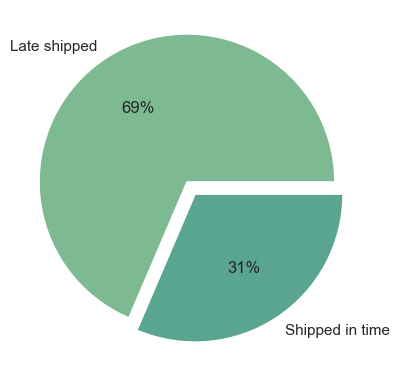

In [69]:
unhappy_customers=np.intersect1d(customer_targets,late_shipped_customers)

plt.pie([unhappy_customers.shape[0],
         customer_targets.shape[0]-unhappy_customers.shape[0]],
        labels=['Late shipped','Shipped in time'], colors=palette_color,
        explode=[0.1,0], autopct='%.0f%%')
  
# displaying chart
plt.show()

<AxesSubplot: xlabel='Region', ylabel='count'>

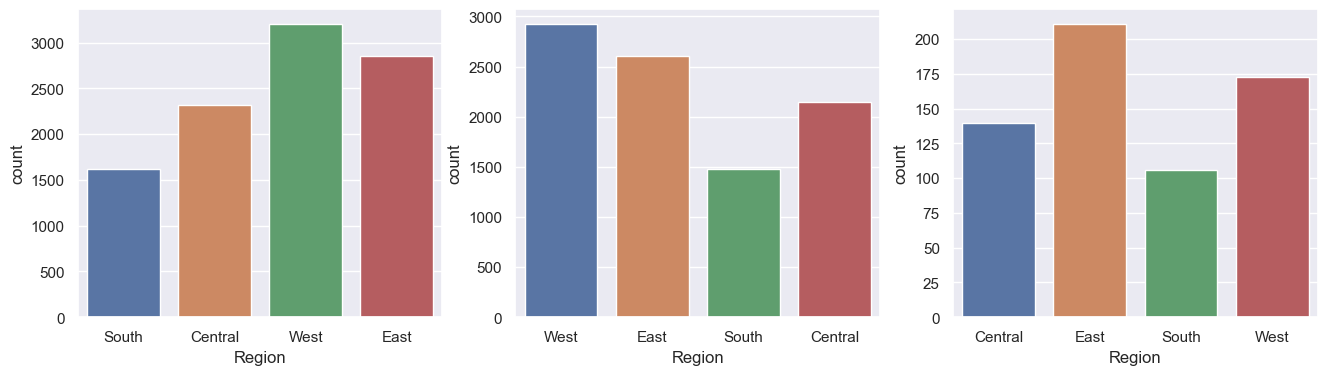

In [70]:
_,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,4))
sns.countplot(x='Region',data=data,ax=axes[0])
sns.countplot(x='Region',data=data.loc[data['Customer ID'].isin(late_shipped_customers),:],ax=axes[1])
sns.countplot(x='Region',data=data.loc[data['Customer ID'].isin(unhappy_customers),:],ax=axes[2])